In [1]:
import numpy as np
a1 = np.arange(1,4)
print(a1*2)

[2 4 6]


In [11]:
for i in a1:
    print(i*2)

2
4
6


In [2]:
import pandas as pd
df = pd.read_csv("../data/starter_data.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [4]:
stats = df.describe()
stats

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [5]:
group_df = df.groupby("category")["value"].mean()
group_df

category
A    11.500000
B    15.666667
C    27.666667
Name: value, dtype: float64

In [6]:
import os
os.makedirs("../data/processed", exist_ok=True)

In [7]:
stats.to_csv("../data/processed/summary.csv") 

print("Saved to:", os.path.abspath("../data/processed/summary.csv"))

Saved to: C:\Users\21028\bootcamp_project_kexintan\data\processed\summary.csv


<Axes: xlabel='category'>

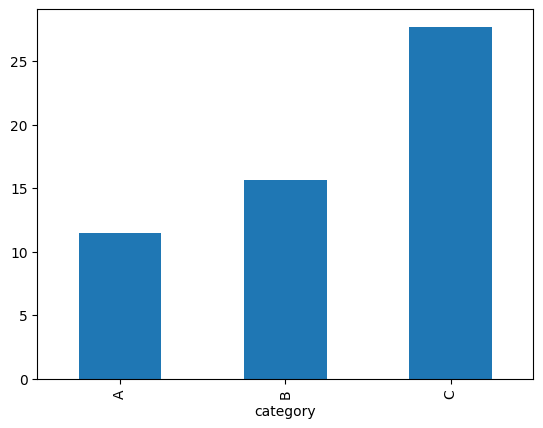

In [8]:
plot = group_df.plot(kind='bar')
plot

In [9]:
%%writefile ../src/utils.py

def get_summary_stats(df, group_col='category', value_col='value'):   
    return {
        'mean': df.groupby(group_col)[value_col].mean(),
        'median': df.groupby(group_col)[value_col].median(),
        'std': df.groupby(group_col)[value_col].std()
    }


Overwriting ../src/utils.py


In [10]:
import sys
sys.path.append("..")

from src.utils import get_summary_stats

# Usage
stat1 = get_summary_stats(df)
stat1

{'mean': category
 A    11.500000
 B    15.666667
 C    27.666667
 Name: value, dtype: float64,
 'median': category
 A    11.5
 B    15.0
 C    28.0
 Name: value, dtype: float64,
 'std': category
 A    1.290994
 B    2.081666
 C    2.516611
 Name: value, dtype: float64}